In [20]:
import pandas as pd
import numpy as np

In [22]:
FILE_TRAIN = 'data/pp-training.csv'
FILE_TEST = 'data/pp-testing.csv'

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor

from sklearn.tree import DecisionTreeRegressor

In [24]:
cols = ['lat','lon','surface_covered_in_m2','surface_total_in_m2','rooms','bano','property_type']
df = pd.read_csv(FILE_TRAIN, low_memory=False, usecols=(cols+['price']))

In [25]:
#separo el set de train para probar el algoritmo
allcols= df.columns
alldata = df[cols+['price']]
X_train, X_test, y_train, y_test = train_test_split(alldata.drop(['price'], axis=1),
                                                    alldata.price, test_size=0.1, random_state=0)

In [26]:
regr = AdaBoostRegressor(n_estimators = 50,learning_rate = 1,random_state = 0)

In [27]:
regr.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1, loss='linear',
         n_estimators=50, random_state=0)

In [30]:
regr.score(X_test, y_test)

-35.105051382361388

In [ ]:
#Pruebo aumentando estimators

In [31]:
regr = AdaBoostRegressor(n_estimators = 200,learning_rate = 1,random_state = 0)

In [32]:
regr.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1, loss='linear',
         n_estimators=200, random_state=0)

In [34]:
regr.score(X_test, y_test)

-117.8473368159345

In [ ]:
#cambio las columnas a usar

In [35]:
cols = ['state_name','place_name','place_with_parent_names','surface_covered_in_m2','surface_total_in_m2','rooms','bano','property_type']
df = pd.read_csv(FILE_TRAIN, low_memory=False, usecols=(cols+['price']))

In [36]:
alldata = df
allcols = list(alldata)
X_train, X_test, y_train, y_test = train_test_split(alldata.drop(['price'], axis=1),
                                                    alldata.price, test_size=0.1, random_state=0)

In [37]:
regr = AdaBoostRegressor(n_estimators = 50,learning_rate = 1,random_state = 0)


In [38]:
regr.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1, loss='linear',
         n_estimators=50, random_state=0)

In [39]:
regr.score(X_test, y_test)

-14.482258955242012

In [57]:
#vuelvo a aumentar estimators pero ahora a 500
regr = AdaBoostRegressor(n_estimators = 500,learning_rate = 1,random_state = 0)


In [58]:
regr.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1, loss='linear',
         n_estimators=500, random_state=0)

In [59]:
pred1 = regr.predict(X_test)

In [47]:
regr.score(X_test, y_test)

-14.482258955242012

In [ ]:
#subir los estimators no cambio nada
#grafico que no hay cambio

In [48]:
pred = regr.predict(X_test)

In [50]:
pred

array([  649477.86364953,   649477.86364953,  1018191.98787077, ...,
        1316724.58499723,   820131.47815054,  4807777.90335053])

In [ ]:
#pruebo un ensemble

In [51]:
regr1 = DecisionTreeRegressor(max_depth=4)

regr2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=0)


In [54]:
regr2.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=300,
         random_state=0)

In [55]:
regr2.score(X_test,y_test)

-65.027558804693626

In [56]:
pred2 = regr2.predict(X_test)

In [ ]:
#al hacer ensamble tampoco

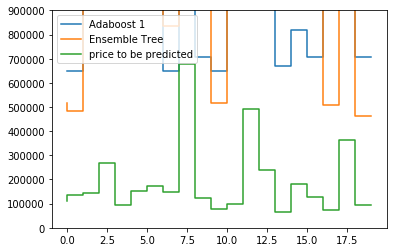

In [61]:

import matplotlib.pyplot as plt
plt.step(range(20),pred1[:20], label='Adaboost 1')
plt.step(range(20),pred2[:20] , label = 'Ensemble Tree')
plt.step(range(20),y_test[:20], label = 'price to be predicted')
plt.legend()
plt.ylim(0, 900000)

plt.show()

In [4]:
df = pd.read_csv(FILE_TRAIN, low_memory=False) 

In [7]:
allcols = df.columns
alldata = df
X_train, X_test, y_train, y_test = train_test_split(alldata.drop(['price_aprox_usd'], axis=1),
                                                    alldata.price_aprox_usd, test_size=0.2)


In [8]:
regr = AdaBoostRegressor()
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

-2.0256913597680968